<a href="https://colab.research.google.com/github/BramanTyamahedrawan/PCVK-Pertemuan-3/blob/main/Praktikum_Pertemuan_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA   : BRAMAN TYAMAHENDRAWAN**

**KELAS  : 3C**

**NIM    : 2141720097**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**Transformasi Linear Brightness**

Formula:

g(x,y) = f(x,y) + b

Keterangan:
*   g(x,y) adalah nilai pixel setelah transformasi
*   f(x,y) adalah nilai pixel asli
*   b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


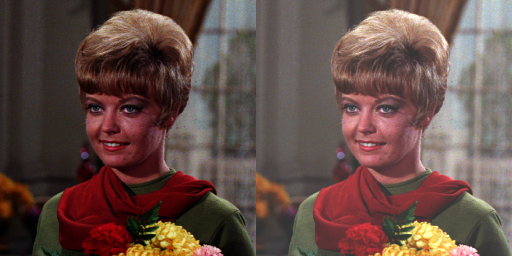

In [73]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

**Formula:**

g(x,y) = 255 - f(x,y)

Keterangan:
*   g(x,y) adalah citra negative
*   f(x,y) adalah citra asli

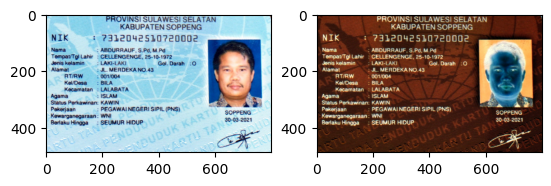

In [10]:
img = cv.imread('/content/drive/MyDrive/PCVK/pertemuan2/Salinan KTP.jpeg')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

**Formula**

g(x,y) = a * f(x,y) + b

Keterangan:
*   g(x,y) adalah nilai pixel setelah transformasi
*   f(x,y) adalah nilai pixel asli
*   a adalah nilai contrast
*   b adalah nilai brightness.

Mengubah kontras tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


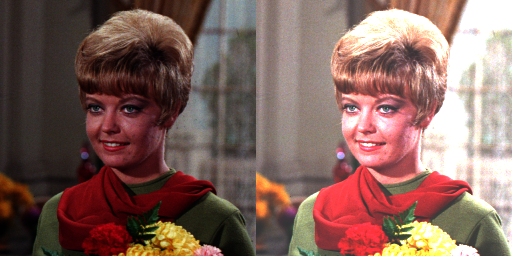

In [74]:
print('Mengubah kontras tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

**Formula:**

`s = c * log(1 + r)`

Keterangan
*   c adalah konstanta
*   r adalah nilai grey-level citra input
*   s adalah nilai grey-level citra output

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 50


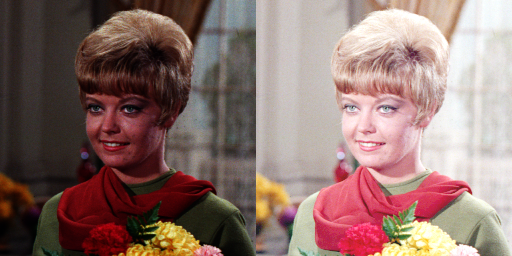

In [75]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

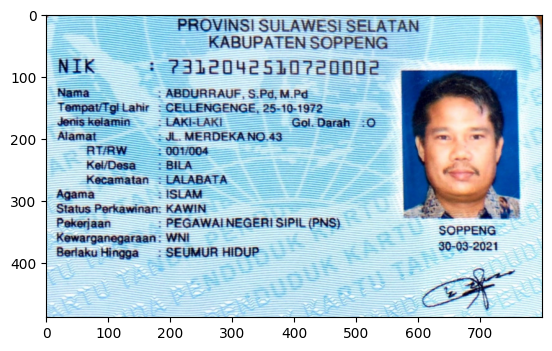

In [15]:
img = cv.imread('/content/drive/MyDrive/PCVK/pertemuan2/Salinan KTP.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

**Grayscale Average**

**Formula:**

`Grayscale avg = (R + G + B) / 3`



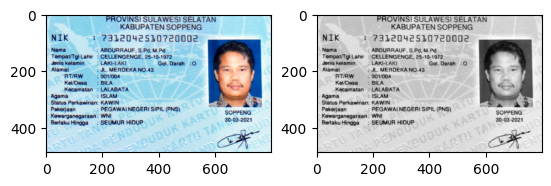

In [16]:
img_avg = img
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**Grayscale Lightness**

**Formula:**

`Grayscale lighness = (max[R, G, B] + min [R, G, B]) / 2`

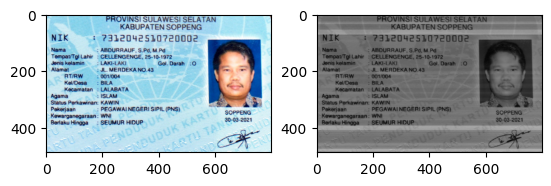

In [17]:
img_lightness = img
img_lightness[:] = np.max(img_lightness,axis=-1, keepdims=100)/2 + np.min(img_lightness,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lightness)

**Grayscale Luminance**

**Formula:**

`Grayscale luminance = 0.21R + 0.72G + 0.07B`

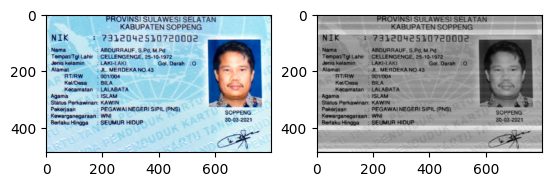

In [18]:
img_luminance = img
R, G, B = img_luminance[:,:,0], img_luminance[:,:,1], img_luminance[:,:,2]
gray_img_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_luminance, cmap='gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

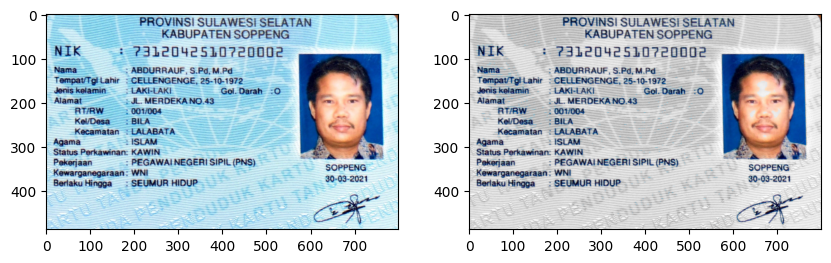

In [117]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/pertemuan2/Salinan KTP.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img_rgb[:, :, 2], 200, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:, :, 2] = mask

gray_background = cv.cvtColor(mask3, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_gray = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)

# Mengatur latar belakang abu-abu menjadi warna asli
img_gray[mask3[:, :, 2] == 0] = img_rgb[mask3[:, :, 2] == 0]

img_blue_text = img_rgb.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask3[i, j, 2] == 255:
            img_blue_text[i, j] = [0, 0, 255]

# Mengatur alpha channel hanya pada latar belakang
alpha_channel = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
alpha_channel[mask3[:, :, 2] == 50] = 0

# Menggabungkan gambar utama dengan alpha channel
out = np.dstack((img_gray, alpha_channel))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[1].imshow(out)
plt.show()


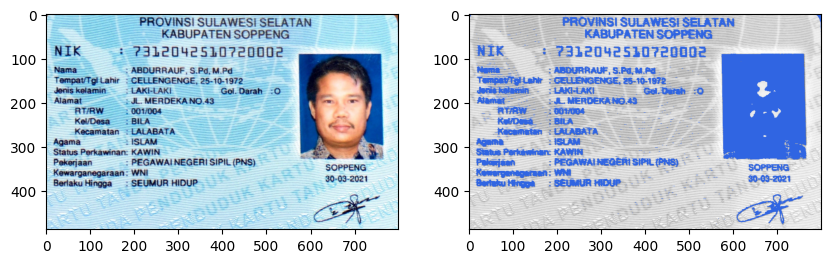

In [116]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/pertemuan2/Salinan KTP.jpeg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

ret, mask = cv.threshold(img_rgb[:, :, 2], 200, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:, :, 2] = mask

gray_background = cv.cvtColor(mask3, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
img_gray = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
img_gray[gray_background == 0] = [48, 101, 226]

img_blue_text = img_rgb.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if mask3[i, j, 2] == 255:
            img_blue_text[i, j] = [0, 0, 255]

# Mengatur alpha channel hanya pada latar belakang
alpha_channel = np.ones((img.shape[0], img.shape[1], 1), dtype=np.uint8) * 255
alpha_channel[mask3[:, :, 2] == 50] = 0

# Menggabungkan gambar utama dengan alpha channel
out = np.dstack((img_gray, alpha_channel))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_rgb)
ax[1].imshow(out)
plt.show()
